In [1]:
import sim_plotter as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('final_packages.csv')

sp.sim_plotter(df, "08/30/2024")
df_simulated_received = pd.read_csv('simulated_received_ts.csv')


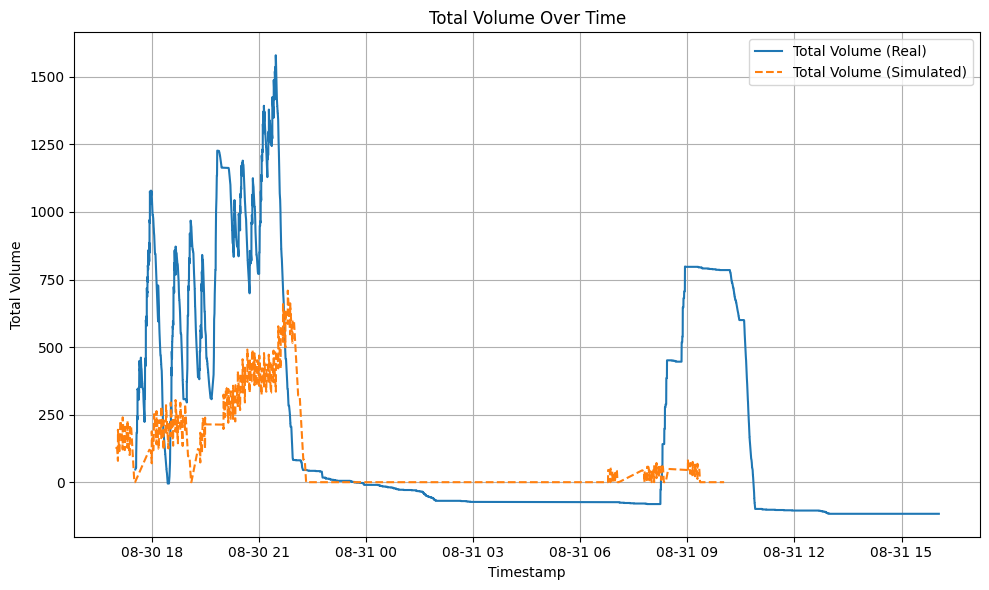

In [2]:
df_real = pd.read_csv('2024-08-30_loading_dock.csv')
df_real['timestamp'] = pd.to_datetime(df_real['timestamp'])
df_simulated_received['timestamp'] = pd.to_datetime(df_simulated_received['timestamp'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_real.iloc[:, 0], df_real.iloc[:, 1], label='Total Volume (Real)')

plt.plot(df_simulated_received.iloc[:, 0], df_simulated_received.iloc[:, 1], label='Total Volume (Simulated)', linestyle='--')

# Set plot labels and title
plt.xlabel('Timestamp')
plt.ylabel('Total Volume')
plt.title('Total Volume Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
# Convert timestamps to datetime


# Interpolate simulated data to match real data timestamps
simulated_data_interp = df_simulated_received.set_index('timestamp').reindex(df_real['timestamp']).interpolate(method='time').reset_index()

# Calculate error metrics
real_values = df_real['Received']
simulated_values = simulated_data_interp['Received']

mae = np.mean(np.abs(real_values - simulated_values))
mse = np.mean((real_values - simulated_values) ** 2)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 163.05431181608273
MSE: 81457.34444332898
RMSE: 285.4073307456012
